In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('output_data.csv')

# Selecting relevant features for clustering
selected_features = [
    'Name Of District',
    'Boys',
    'Girls',
    'Boys + Girls'
]
data = data[selected_features]
data = data.replace("NR", 0)

In [3]:
data

,Name Of District,Boys,Girls,Boys + Girls
0,Ahmedabad,10.43,5.36,8.33
1,Amreli,11.80,14.35,12.89
2,Anand,18.01,18.97,18.41
3,Aravalli,9.10,10.26,9.62
4,Banas Kantha,20.78,16.58,19.17
5,Bharuch,15.82,10.04,13.27
6,Bhavnagar,13.13,10.97,12.21
7,Botad,20.45,17.15,19.17
8,Chhotaudepur,13.96,11.30,12.71
9,Devbhoomi Dwarka,23.37,18.33,21.30


In [4]:
# Drop rows with NULL values (NaNs)
data.dropna(inplace=True)

# Extract the 'year' column, convert it to a numerical format
#data['year'] = data['year'].str.extract(r'(\d{4})').astype(int)


In [5]:
data

,Name Of District,Boys,Girls,Boys + Girls
0,Ahmedabad,10.43,5.36,8.33
1,Amreli,11.80,14.35,12.89
2,Anand,18.01,18.97,18.41
3,Aravalli,9.10,10.26,9.62
4,Banas Kantha,20.78,16.58,19.17
5,Bharuch,15.82,10.04,13.27
6,Bhavnagar,13.13,10.97,12.21
7,Botad,20.45,17.15,19.17
8,Chhotaudepur,13.96,11.30,12.71
9,Devbhoomi Dwarka,23.37,18.33,21.30


In [6]:
# Standardize the numerical features for clustering
scaler = StandardScaler()
numerical_features = data.drop(columns=['Name Of District'])

In [7]:
scaled_features = scaler.fit_transform(numerical_features)

In [8]:
scaled_features

array([[-0.86319214, -1.74656033, -1.23482552],
       [-0.62377548,  0.24304169, -0.31630578],
       [ 0.46146358,  1.26550679,  0.79558655],
       [-1.09561855, -0.66212764, -0.97498112],
       [ 0.94553962,  0.73656922,  0.94867317],
       [ 0.07874642, -0.71081645, -0.23976246],
       [-0.39134908, -0.50499556, -0.45327802],
       [ 0.88786991,  0.86271751,  0.94867317],
       [-0.24630102, -0.43196233, -0.35256314],
       [ 1.39815945,  1.1238666 ,  1.37771858],
       [ 0.20457124,  0.49312514,  0.3161837 ],
       [-0.02785516, -0.32130594, -0.11689031],
       [-1.58843242, -0.94540802, -1.39999793],
       [ 0.14515397, -0.3899129 , -0.07056146],
       [-1.79464531, -0.95426053, -1.54704167],
       [ 2.78572758,  1.37395006,  2.43119627],
       [ 0.31292039,  1.85862508,  0.9224873 ],
       [ 0.58379326,  0.36918998,  0.55185653],
       [-1.0082402 ,  0.05492581, -0.61845043],
       [ 0.13117343,  0.49976453,  0.28596923],
       [-0.02261246,  0.01066325, -0.030

In [9]:
# hierarchical clustering
agg_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')  # Adjust n_clusters as needed
data['Cluster_Label'] = agg_clustering.fit_predict(scaled_features)

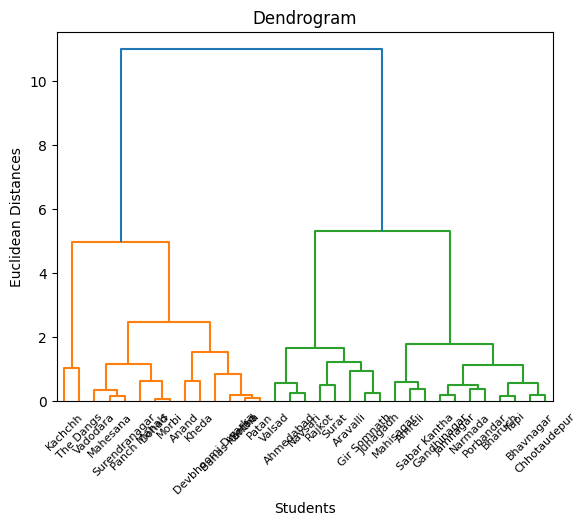

In [10]:
# Dendrogram
lbl = data['Name Of District'].tolist()
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'), labels=lbl)

# Visualize the dendrogram
plt.title('Dendrogram')
plt.xlabel('Students')
plt.ylabel('Euclidean Distances')
plt.show()

In [11]:
result_data = data[['Name Of District', 'Cluster_Label']]
print(result_data)
result_data.to_csv("cluster.csv")

    Name Of District  Cluster_Label
0          Ahmedabad              2
1             Amreli              0
2              Anand              1
3           Aravalli              2
4       Banas Kantha              1
5            Bharuch              0
6          Bhavnagar              0
7              Botad              1
8       Chhotaudepur              0
9   Devbhoomi Dwarka              1
10             Dohad              4
11       Gandhinagar              0
12       Gir Somnath              2
13          Jamnagar              0
14          Junagadh              2
15           Kachchh              3
16             Kheda              1
17          Mahesana              4
18         Mahisagar              0
19             Morbi              4
20           Narmada              0
21           Navsari              2
22      Panch Mahals              4
23             Patan              1
24         Porbandar              0
25            Rajkot              2
26      Sabar Kantha        